## Census exercise - Exploration

Since we know that the CSV doesn't include the headers. We start by manually getting the columns from the metadata txt file into a list that we can use later.

We name the columns to make them easier to understand. We also get which features are Continuous and Nominal so we can pass this info to Pandas later.

In [1]:
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [93]:
import numpy as np
import pandas as pd

In [3]:
columns = [
    "AGE", "CLS_WORKER", "INDUSTRY", "OCCUPATION", "EDUCATION",
    "WAGE", "SCHOOL", "MARITAL", "MAJ_INDUSTRY", "MAJ_OCCUPATION",
    "RACE", "HISPANIC", "GENDER", "UNION_MEM", "UNEMPLOYMENT",
    "EMPLOYMENT_STATUS", "CAPGAIN", "CAPLOSS" , "DIVVAL", "TAX_STATUS",
    "RESIDENCE_REG_PREV", "RESIDENCE_STATE_PREV", "HD_STATUS", "HD_SUMMARY",
    "INSTANCE_WEIGHT",
    "MIG_MTR1", "MIG_MTR3", "MIG_MTR4", "MIG_SAME", "MIG_SUN",
    "NUM_EMP", "PARENT", "FATHER_COUNTRY", "MOTHER_COUNTRY", "COUNTRY", "CITIZENSHIP",
    "TYPE_WORK", "VET_ADMIN", "VET_BENEFITS", "WEEKS_WORKED", "YEAR",
    "TARGET"
]

col_types = [
    "C", "N", "N", "N", "N",
    "C", "N", "N", "N", "N",
    "N", "N", "N", "N", "N",
    "N", "C", "C", "C", "N",
    "N", "N", "N", "N",
    "C",
    "N", "N", "N", "N", "N",
    "C", "N", "N", "N", "N", "N", 
    "N", "N", "N", "C", "N",
    "N",
]

In [4]:
len(columns), len(col_types)

(42, 42)

Read one line of the file to see how many columns they are.

In [5]:
df = pd.read_csv("./data/us_census_full/census_income_learn.csv", header=None, nrows=1)

In [6]:
len(df.columns)

42

Indeed there is 42 columns.

Now read the whole dataset and map it to the columns and make the ones that are "Nominal" to type "Categorical".

Before doing that I noted by exploring the dataset manually that while there is no empty missing values there is some that represented as: "?", "Not in universe", and other variants.

In [7]:
nans = ["?", "Not in universe", "Not in universe or children", "Not in universe under 1 year old"]

In [8]:
df = pd.read_csv("./data/us_census_full/census_income_learn.csv", header=None, names=columns, na_values=nans, skipinitialspace=True)

In [9]:
for col, type_ in zip(df.columns, col_types):
    if type_ == "N":
        df[col] = df[col].astype("category")

In [10]:
df.head()

,AGE,CLS_WORKER,INDUSTRY,OCCUPATION,EDUCATION,WAGE,SCHOOL,MARITAL,MAJ_INDUSTRY,MAJ_OCCUPATION,...,FATHER_COUNTRY,MOTHER_COUNTRY,COUNTRY,CITIZENSHIP,TYPE_WORK,VET_ADMIN,VET_BENEFITS,WEEKS_WORKED,YEAR,TARGET
0,73,NaN,0,0,High school graduate,0,NaN,Widowed,NaN,NaN,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,NaN,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,2,52,94,- 50000.
2,18,NaN,0,0,10th grade,0,High school,Never married,NaN,NaN,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,NaN,2,0,95,- 50000.
3,9,NaN,0,0,Children,0,NaN,Never married,NaN,NaN,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,0,0,94,- 50000.
4,10,NaN,0,0,Children,0,NaN,Never married,NaN,NaN,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,0,0,94,- 50000.


We can also look at the info of the DataFrame and see that it indeed matches the types of the metadata file.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
AGE                     199523 non-null int64
CLS_WORKER              99278 non-null category
INDUSTRY                199523 non-null category
OCCUPATION              199523 non-null category
EDUCATION               199523 non-null category
WAGE                    199523 non-null int64
SCHOOL                  12580 non-null category
MARITAL                 199523 non-null category
MAJ_INDUSTRY            98839 non-null category
MAJ_OCCUPATION          98839 non-null category
RACE                    199523 non-null category
HISPANIC                198649 non-null category
GENDER                  199523 non-null category
UNION_MEM               19064 non-null category
UNEMPLOYMENT            6070 non-null category
EMPLOYMENT_STATUS       199523 non-null category
CAPGAIN                 199523 non-null int64
CAPLOSS                 199523 non-null int64
DIVVAL                  19

Looks like everything is matching, so far so good.

## Missing values

How many missing values do we have for each column?

In [12]:
df.isnull().mean() * 100

AGE                      0.000000
CLS_WORKER              50.242328
INDUSTRY                 0.000000
OCCUPATION               0.000000
EDUCATION                0.000000
WAGE                     0.000000
SCHOOL                  93.694962
MARITAL                  0.000000
MAJ_INDUSTRY            50.462353
MAJ_OCCUPATION          50.462353
RACE                     0.000000
HISPANIC                 0.438045
GENDER                   0.000000
UNION_MEM               90.445212
UNEMPLOYMENT            96.957744
EMPLOYMENT_STATUS        0.000000
CAPGAIN                  0.000000
CAPLOSS                  0.000000
DIVVAL                   0.000000
TAX_STATUS               0.000000
RESIDENCE_REG_PREV      92.094646
RESIDENCE_STATE_PREV    92.449492
HD_STATUS                0.000000
HD_SUMMARY               0.000000
INSTANCE_WEIGHT          0.000000
MIG_MTR1                50.726984
MIG_MTR3                50.726984
MIG_MTR4                50.726984
MIG_SAME                50.726984
MIG_SUN       

Based on this we can see that I might have made the wrong assumption of taking "Not in universe" as a missing value for some features.

For example, for the `SCHOOL` feature this represents that the person was not in School as that week and this might be valuable information. For other features such as `VET_ADMIN` and `UNION_MEM` it does represent a missing value, probably an unanswered question since there is a full range of options for those features.

Based on this I decided to fill some of the missing values for some of the features.

In [13]:
df.SCHOOL.cat.add_categories(["No"], inplace=True)

In [14]:
df.SCHOOL.fillna(value='No', inplace=True)

`MAJ_INDUSTRY` and `MAJ_OCCUPATION` missing value means that this are children which is valuable.

In [15]:
df.MAJ_INDUSTRY.cat.add_categories(["NA"], inplace=True)
df.MAJ_OCCUPATION.cat.add_categories(["NA"], inplace=True)

In [16]:
df.MAJ_INDUSTRY.fillna(value='NA', inplace=True)
df.MAJ_OCCUPATION.fillna(value='NA', inplace=True)

`RESIDENCE_REG_PREV` and `RESIDENCE_STATE_PREV` missing value might mean that the person did not moved states or regions.

In [17]:
df.RESIDENCE_REG_PREV.cat.add_categories(["NA"], inplace=True)
df.RESIDENCE_STATE_PREV.cat.add_categories(["NA"], inplace=True)

In [18]:
df.RESIDENCE_REG_PREV.fillna(value='NA', inplace=True)
df.RESIDENCE_STATE_PREV.fillna(value='NA', inplace=True)

`UNEMPLOYMENT` has a lot of misisng values so it won't provide a lot of value to a model and also that information is already encoded in the `EMPLOYMENT_STATUS` so remove it.

In [19]:
del df["UNEMPLOYMENT"]

In [20]:
df.isnull().mean() * 100

AGE                      0.000000
CLS_WORKER              50.242328
INDUSTRY                 0.000000
OCCUPATION               0.000000
EDUCATION                0.000000
WAGE                     0.000000
SCHOOL                   0.000000
MARITAL                  0.000000
MAJ_INDUSTRY             0.000000
MAJ_OCCUPATION           0.000000
RACE                     0.000000
HISPANIC                 0.438045
GENDER                   0.000000
UNION_MEM               90.445212
EMPLOYMENT_STATUS        0.000000
CAPGAIN                  0.000000
CAPLOSS                  0.000000
DIVVAL                   0.000000
TAX_STATUS               0.000000
RESIDENCE_REG_PREV       0.000000
RESIDENCE_STATE_PREV     0.000000
HD_STATUS                0.000000
HD_SUMMARY               0.000000
INSTANCE_WEIGHT          0.000000
MIG_MTR1                50.726984
MIG_MTR3                50.726984
MIG_MTR4                50.726984
MIG_SAME                50.726984
MIG_SUN                 92.094646
NUM_EMP       

We fixed some of the features, this needs more work and research to prove this assumptions and complete for the other variables.

## Feature selection

We already did a little bit of manual feature selection based on our domain knowledge in the previous section but we can do a little bit more:

1. `CAPGAIN` and `CAPLOSS` can be combined as `CAPNET`
1. Based on the metadata file `HD_SUMMARY` is a basically subset of `HD_STATUS` so we remove `HD_STATUS`

Again this is no an exhaustive list, for example the Country and Citizenship are likely to be show the same value but might not be the case so we let it there to see what the algorithm thinks.

In [21]:
df["CAPNET"] = df.CAPGAIN - df.CAPLOSS

In [22]:
del df["CAPGAIN"]
del df["CAPLOSS"]

In [23]:
del df["HD_STATUS"]

Remove the `INSTANCE_WEIGHT` as described in the metadata file.

In [24]:
del df["INSTANCE_WEIGHT"]

Finally create a column for the prediction as a number

In [25]:
df["PREDICT"] = 0
df.loc[df.TARGET == '50000+.', 'PREDICT'] = 1

## Visualizations

I usually start this by looking at the distribution of the target variable, the metadata file says its quite heavy on the people who don't make more than 50k. Let's check that.

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns

In [27]:
df.TARGET.value_counts()

- 50000.    187141
50000+.      12382
Name: TARGET, dtype: int64

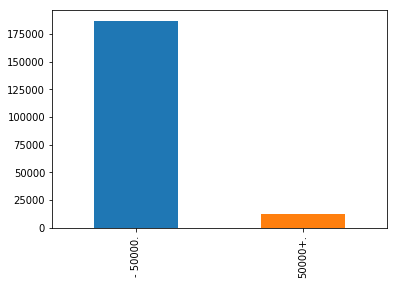

In [28]:
df.TARGET.value_counts().plot(kind='bar')

Indeed there is a big difference between the number of people who make more than 50k.

Based on the problem there is some intuition I had on what the best variables for this particular problem might be, for example: Employment, Gender, Race and Citizenship.

Let's plot that and see if that intuition is valid.

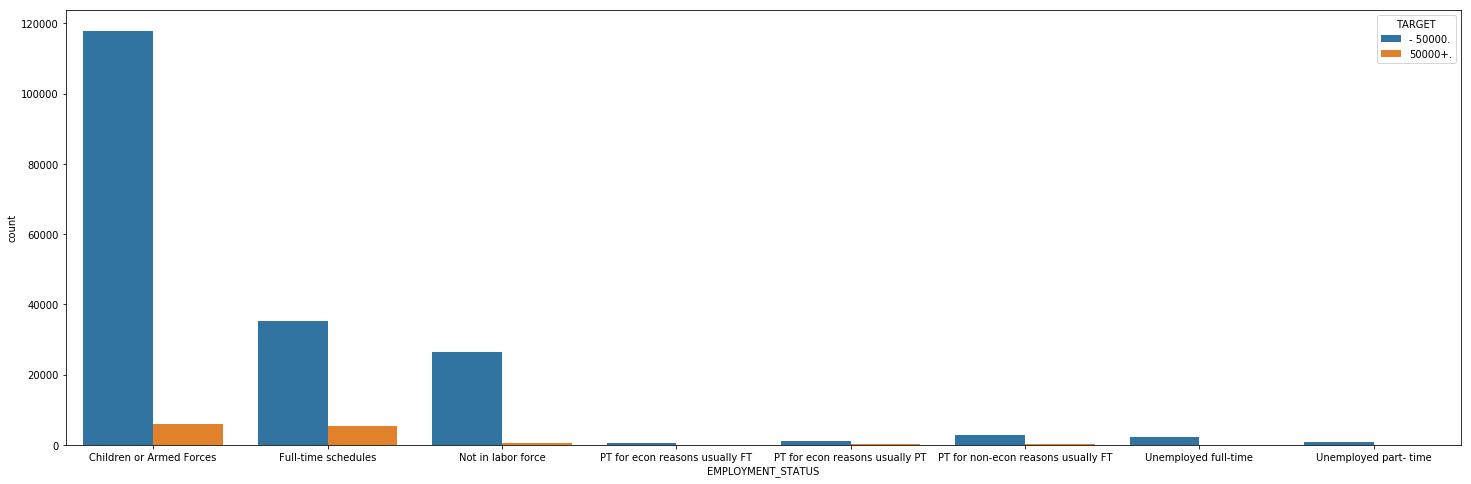

In [41]:
plt.figure(figsize=(25, 8))
ax = sns.countplot(x="EMPLOYMENT_STATUS", hue="TARGET", data=df)

We can see how "Children or being in the Armed Forces" looks like a strong feature and also shows that there is a lot of "Children or being in the Armed Forces" in the dataset, something to take into account later. Also as expected being "Not in labor force, Unemployed full-time or part-time".

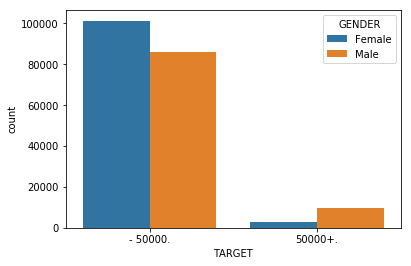

In [43]:
ax = sns.countplot(x="TARGET", hue="GENDER", data=df)

We can see that in the -50k section females are higher and in the +50k males are higher. So this should help the classifier.

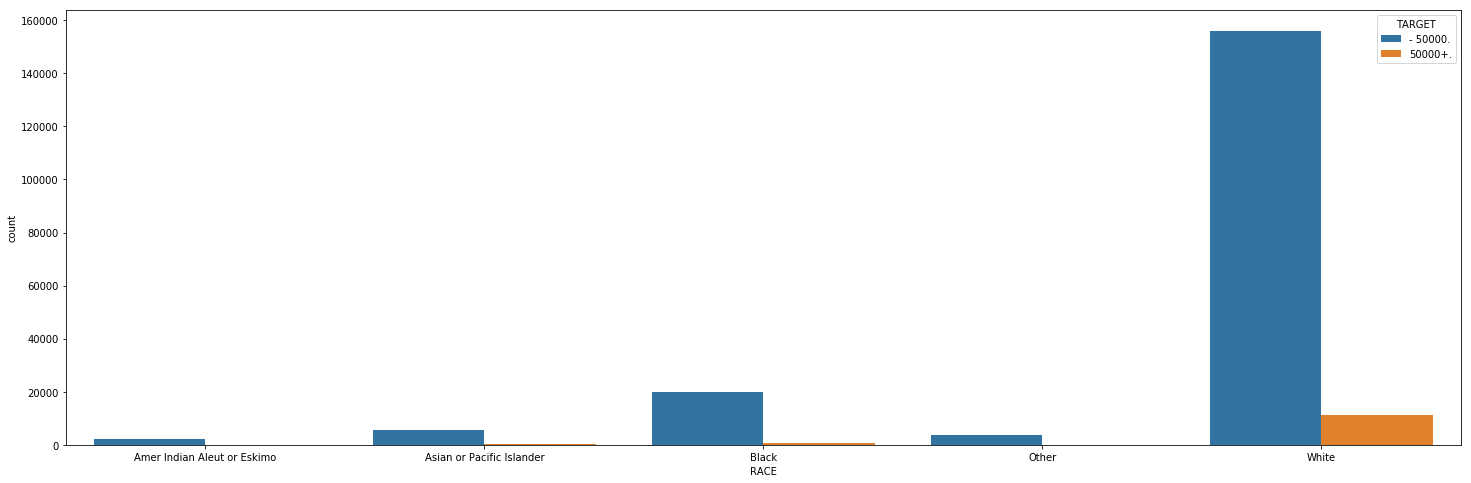

In [44]:
plt.figure(figsize=(25, 8))
ax = sns.countplot(x="RACE", hue="TARGET", data=df)

Here we see how there predominant Race in the dataset is "White" but more interesting is that "Black" has a strong precense in the -50k section.

We can also take a look at the numerical features and see its distribution, for example it's possible that Age is correlated to the salary.

First we can see the general distribution for the Age.

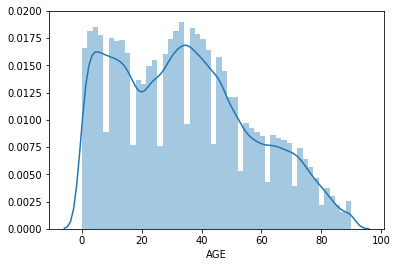

In [32]:
sns.distplot(df.AGE)

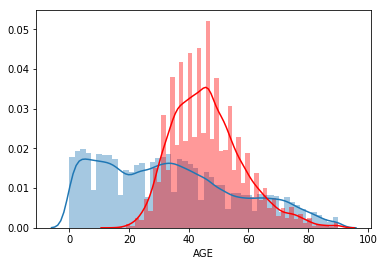

In [33]:
sns.distplot(df[df.TARGET == '- 50000.'].AGE)
sns.distplot(df[df.TARGET == '50000+.'].AGE, color='red')

As expected the range of ages that are "working" ages (20s to 50s) have higher distribution of eople on winning more than 50k.

What about the other Numerical variables?

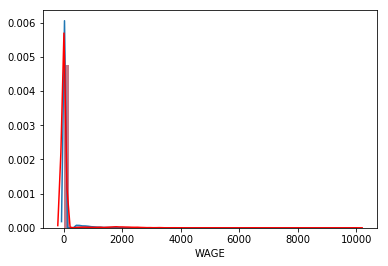

In [34]:
sns.distplot(df[df.TARGET == '- 50000.'].WAGE)
sns.distplot(df[df.TARGET == '50000+.'].WAGE, color='red')

Here we can see most of the values are around 0, since most wages are on the indeed 0 in the dataset, we can see that by looking at the quantiles.

In [45]:
df.describe()

,AGE,WAGE,DIVVAL,NUM_EMP,WEEKS_WORKED,CAPNET,PREDICT
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,55.426908,197.529533,1.956180,23.174897,397.405201,0.062058
std,22.310895,274.896454,1984.163658,2.365126,24.411488,4708.839558,0.241261
min,0.000000,0.000000,0.000000,0.000000,0.000000,-4608.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000
75%,50.000000,0.000000,0.000000,4.000000,52.000000,0.000000,0.000000
max,90.000000,9999.000000,99999.000000,6.000000,52.000000,99999.000000,1.000000


This actually happens for a couple of features, lets remote the zeros and outliers and plot the distributions for all of them.

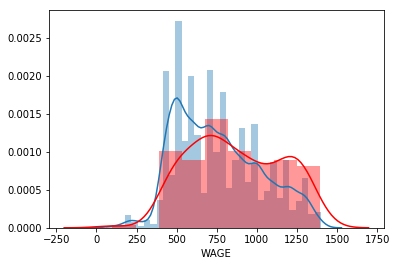

In [61]:
sns.distplot(df.WAGE[(df.TARGET == '- 50000.') & (df.WAGE > 0) & (df.WAGE < df.WAGE.quantile(0.99))])
sns.distplot(df.WAGE[(df.TARGET == '50000+.') & (df.WAGE > 0) & (df.WAGE < df.WAGE.quantile(0.99))], color='red')

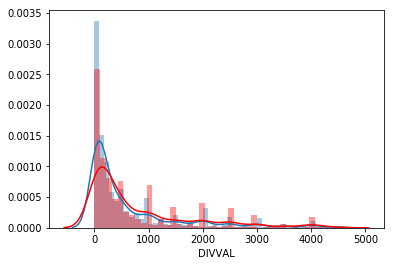

In [62]:
sns.distplot(df.DIVVAL[(df.TARGET == '- 50000.') & (df.DIVVAL > 0) & (df.DIVVAL < df.DIVVAL.quantile(0.99))])
sns.distplot(df.DIVVAL[(df.TARGET == '50000+.') & (df.DIVVAL > 0) & (df.DIVVAL < df.DIVVAL.quantile(0.99))], color='red')

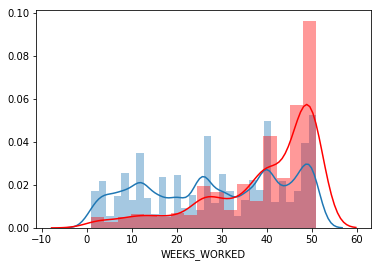

In [63]:
sns.distplot(df.WEEKS_WORKED[(df.TARGET == '- 50000.') & (df.WEEKS_WORKED > 0) & (df.WEEKS_WORKED < df.WEEKS_WORKED.quantile(0.99))])
sns.distplot(df.WEEKS_WORKED[(df.TARGET == '50000+.') & (df.WEEKS_WORKED > 0) & (df.WEEKS_WORKED < df.WEEKS_WORKED.quantile(0.99))], color='red')

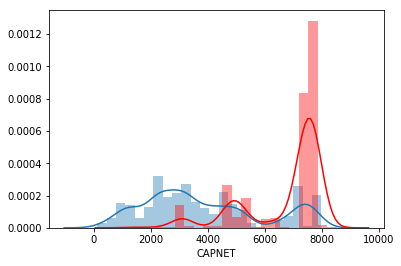

In [64]:
sns.distplot(df.CAPNET[(df.TARGET == '- 50000.') & (df.CAPNET > 0) & (df.CAPNET < df.CAPNET.quantile(0.99))])
sns.distplot(df.CAPNET[(df.TARGET == '50000+.') & (df.CAPNET > 0) & (df.CAPNET < df.CAPNET.quantile(0.99))], color='red')

## Model

We are going to build two models, one Logistic regression and one Extra Tree classifier using scikit-learn.

First we move the preprocessing steps we used in the training data to a function we can resuse on the test dataset.

Then we load everything and make numpy arrays.

In [91]:
from sklearn import linear_model
from sklearn.metrics import confusion_matrix

In [66]:
def preprocess(fname):
    nans = ["?", "Not in universe", "Not in universe or children", "Not in universe under 1 year old"]
    df = pd.read_csv(fname, header=None, names=columns, na_values=nans, skipinitialspace=True)
    
    for col, type_ in zip(df.columns, col_types):
        if type_ == "N":
            df[col] = df[col].astype("category")
            
    df.SCHOOL.cat.add_categories(["No"], inplace=True)
    df.SCHOOL.fillna(value='No', inplace=True)
    
    df.MAJ_INDUSTRY.cat.add_categories(["NA"], inplace=True)
    df.MAJ_OCCUPATION.cat.add_categories(["NA"], inplace=True)
    df.MAJ_INDUSTRY.fillna(value='NA', inplace=True)
    df.MAJ_OCCUPATION.fillna(value='NA', inplace=True)
    
    df.RESIDENCE_REG_PREV.cat.add_categories(["NA"], inplace=True)
    df.RESIDENCE_STATE_PREV.cat.add_categories(["NA"], inplace=True)
    df.RESIDENCE_REG_PREV.fillna(value='NA', inplace=True)
    df.RESIDENCE_STATE_PREV.fillna(value='NA', inplace=True)
    del df["UNEMPLOYMENT"]
    
    df["CAPNET"] = df.CAPGAIN - df.CAPLOSS
    del df["CAPGAIN"]
    del df["CAPLOSS"]
    del df["HD_STATUS"]
    del df["INSTANCE_WEIGHT"]
    df["PREDICT"] = 0
    df.loc[df.TARGET == '50000+.', 'PREDICT'] = 1
        
    del df["TARGET"]
    return df

In [101]:
df_train = preprocess("./data/us_census_full/census_income_learn.csv")
df_test = preprocess("./data/us_census_full/census_income_test.csv")

In [102]:
df_train.head()

,AGE,CLS_WORKER,INDUSTRY,OCCUPATION,EDUCATION,WAGE,SCHOOL,MARITAL,MAJ_INDUSTRY,MAJ_OCCUPATION,...,MOTHER_COUNTRY,COUNTRY,CITIZENSHIP,TYPE_WORK,VET_ADMIN,VET_BENEFITS,WEEKS_WORKED,YEAR,CAPNET,PREDICT
0,73,NaN,0,0,High school graduate,0,No,Widowed,NA,NA,...,United-States,United-States,Native- Born in the United States,0,NaN,2,0,95,0,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,No,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,Native- Born in the United States,0,NaN,2,52,94,0,0
2,18,NaN,0,0,10th grade,0,High school,Never married,NA,NA,...,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,NaN,2,0,95,0,0
3,9,NaN,0,0,Children,0,No,Never married,NA,NA,...,United-States,United-States,Native- Born in the United States,0,NaN,0,0,94,0,0
4,10,NaN,0,0,Children,0,No,Never married,NA,NA,...,United-States,United-States,Native- Born in the United States,0,NaN,0,0,94,0,0


In [103]:
df_test.head()

,AGE,CLS_WORKER,INDUSTRY,OCCUPATION,EDUCATION,WAGE,SCHOOL,MARITAL,MAJ_INDUSTRY,MAJ_OCCUPATION,...,MOTHER_COUNTRY,COUNTRY,CITIZENSHIP,TYPE_WORK,VET_ADMIN,VET_BENEFITS,WEEKS_WORKED,YEAR,CAPNET,PREDICT
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,No,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Foreign born- Not a citizen of U S,0,NaN,2,12,95,0,0
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,No,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,Native- Born in the United States,0,NaN,2,26,95,0,0
2,2,NaN,0,0,Children,0,No,Never married,NA,NA,...,United-States,United-States,Native- Born in the United States,0,NaN,0,0,95,0,0
3,35,Private,29,3,High school graduate,0,No,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,Native- Born in the United States,2,NaN,2,52,94,0,0
4,49,Private,4,34,High school graduate,0,No,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,Native- Born in the United States,0,NaN,2,50,95,0,0


In [104]:
y_train = df_train.PREDICT.values
y_test = df_test.PREDICT.values

In [105]:
del df_train["PREDICT"]
del df_test["PREDICT"]

In [106]:
X_train = pd.get_dummies(df_train).values
X_test = pd.get_dummies(df_test).values

In [107]:
X_train.shape, X_test.shape

((199523, 447), (99762, 447))

Now we can train the model

In [108]:
logistic_clf = linear_model.LogisticRegression()

In [109]:
logistic_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [110]:
logistic_clf.score(X_test, y_test)

0.9527475391431607

In [111]:
confusion_matrix(y_test, logistic_clf.predict(X_test))

array([[92674,   902],
       [ 3812,  2374]])

Now we can train multiple Decision Trees using an Extra Tree Classifier

In [133]:
from sklearn.ensemble import ExtraTreesClassifier

In [157]:
forest = ExtraTreesClassifier(n_estimators=250)

In [158]:
forest.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [159]:
forest.score(X_test, y_test)

0.9485375192959243

We can look which are the most important features for the Decision Tree Classifiers

In [160]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

for i in range(20):
    print("{i}. {name} ({val})".format(i=(i+1), name=df_train.columns[i], val=importances[indices[f]]))

1. AGE (0.009816725729656061)
2. CLS_WORKER (0.009816725729656061)
3. INDUSTRY (0.009816725729656061)
4. OCCUPATION (0.009816725729656061)
5. EDUCATION (0.009816725729656061)
6. WAGE (0.009816725729656061)
7. SCHOOL (0.009816725729656061)
8. MARITAL (0.009816725729656061)
9. MAJ_INDUSTRY (0.009816725729656061)
10. MAJ_OCCUPATION (0.009816725729656061)
11. RACE (0.009816725729656061)
12. HISPANIC (0.009816725729656061)
13. GENDER (0.009816725729656061)
14. UNION_MEM (0.009816725729656061)
15. EMPLOYMENT_STATUS (0.009816725729656061)
16. DIVVAL (0.009816725729656061)
17. TAX_STATUS (0.009816725729656061)
18. RESIDENCE_REG_PREV (0.009816725729656061)
19. RESIDENCE_STATE_PREV (0.009816725729656061)
20. HD_SUMMARY (0.009816725729656061)


The most important features to predict if the salary of a person is above or bellow $50000 are are: Age, Class of Worker (employed), the Industry, Occupation and Education.

## Improvements

There is a couple of quick things to try to improve the models.

1. First of all doing a hyper-parameter search to find the best parameters for this dataset.
1. Since there is a big skew in the classification variable (a lot of -50k compared to +50k) the model will benefit from spliting the training data more balanced, for example using a Stratified K-Fold
1. Better feature selection: there is to many variable that represent similar things just looking at the top 20 we have for example: `OCCUPATION`, `CLS_WORKER`, `EMPLOYMENT_STATUS`